# Step 1: Download the file

In [100]:
import pygrib
import os
import urllib.request

GFS_URL = 'https://nomads.ncdc.noaa.gov/data/gfs4'
URL = 'https://nomads.ncdc.noaa.gov/data/gfs4/201607/20160713/gfs_4_20160713_0000_033.grb2'

# Download the file from `url` and save it locally under `file_name`:
local_file = 'local.grb2'
urllib.request.urlretrieve(URL, local_file) 

('local.grb2', <http.client.HTTPMessage at 0x108cb7470>)

# Step 2: Explore the file

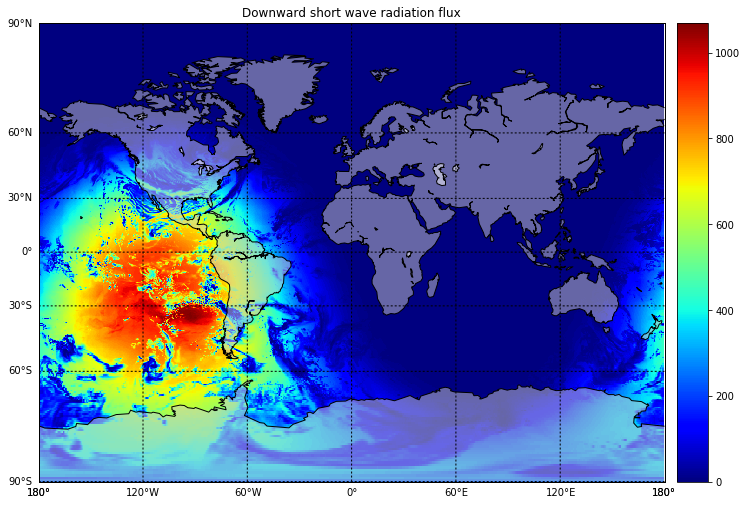

In [101]:
import matplotlib
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import os

cal_bbox = {'north': 42.009517, 'south': 32.528832, 'east': -114.131211, 'west': -124.482003}
world_bbox = {'north': 90, 'south': -90, 'east': -180, 'west': 180}

# Extract the significant wave height of combined wind waves and swell
grbs = pygrib.open(local_file)
data = grbs.select(name='Downward short-wave '
                   'radiation flux')[0]['values']

m=Basemap(projection='mill',
          lat_ts=1,
          llcrnrlon=world_bbox['east'],
          urcrnrlon=world_bbox['west'],
          llcrnrlat=world_bbox['south'],
          urcrnrlat=world_bbox['north'],
          resolution='c')

# convert the lat/lon values to x/y projections.
lats = np.arange(world_bbox['south'], world_bbox['north'] + 0.5, 0.5)
lons = np.arange(world_bbox['east'], world_bbox['west'], 0.5)

x, y = m(*np.meshgrid(lons,lats))


# plot the field using the fast pcolormesh routine 
# set the colormap to jet.
plt.figure(figsize=(12, 16))
m.pcolormesh(x, y, data,shading='flat', cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents(alpha=0.5)
m.drawmapboundary()

m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.
plt.title('Downward short wave radiation flux')
plt.show()

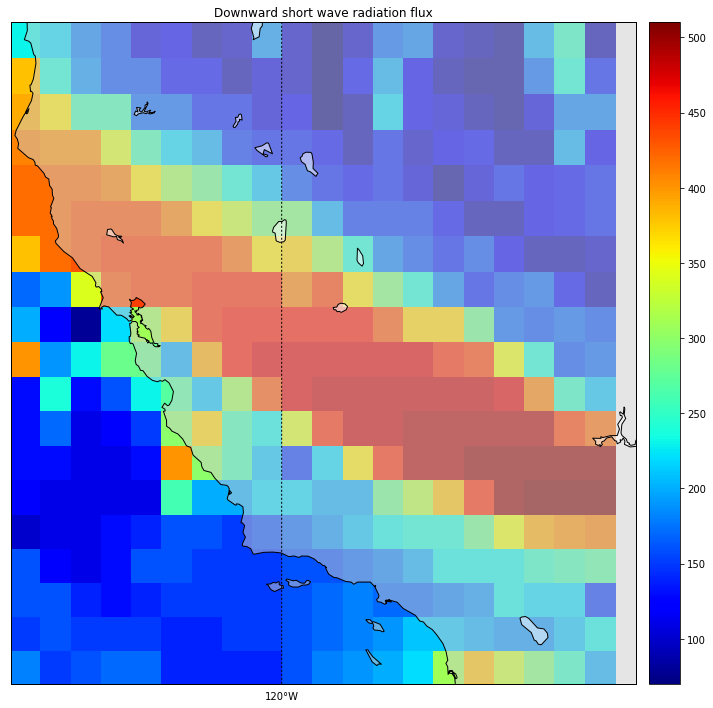

In [103]:
import matplotlib
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

import os

def lat_to_index(lat):
    # This approach is pretty gross and hacky: need to interpolate...
    return int(2 * (lat + 90))

def lon_to_index(lon):
    # This approach is pretty gross and hacky: need to interpolate...
    return int(2 * (lon + 180))


cal_bbox = {'north': 42.009517, 'south': 32.528832, 'west': -114.131211, 'east': -124.482003}
world_bbox = {'north': 90, 'south': -90, 'east': -180, 'west': 180}

# Extract the significant wave height of combined wind waves and swell
grbs = pygrib.open(local_file)
data = grbs.select(name='Downward short-wave '
                   'radiation flux')[0]['values']

m=Basemap(projection='mill',
          lat_ts=10,
          llcrnrlon=cal_bbox['east'],
          urcrnrlon=cal_bbox['west'],
          llcrnrlat=cal_bbox['south'],
          urcrnrlat=cal_bbox['north'],
          resolution='i')

# convert the lat/lon values to x/y projections.
lats = np.arange(cal_bbox['south'], cal_bbox['north']+0.5, 0.5)
lons = np.arange(cal_bbox['east'], cal_bbox['west'], 0.5)
x, y = m(*np.meshgrid(lons,lats))

plt.figure(figsize=(12,16))
# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

cal_data = data[lat_to_index(cal_bbox['south']):lat_to_index(cal_bbox['north']),
                lon_to_index(cal_bbox['east']):lon_to_index(cal_bbox['west'])]
m.pcolormesh(x, y, cal_data, shading='flat', cmap=plt.cm.jet)
m.colorbar(location='right')


# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents(alpha=0.5)
m.drawmapboundary()
m.bluemarble()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('Downward short wave radiation flux')
plt.show()